In [108]:
#imporitng the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [109]:
#loading the datasets
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

# Exploratory Data Analysis

In [110]:
#check the features
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Analysing the dependent variable('SalePrice')

In [111]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

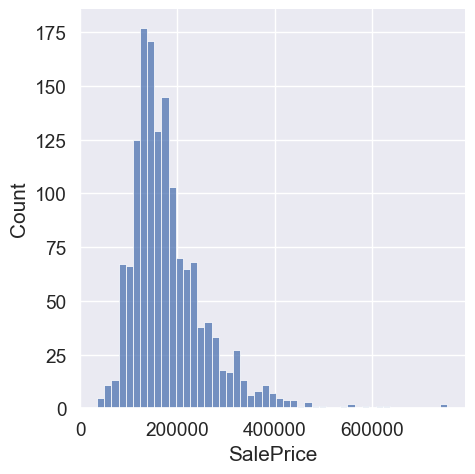

In [112]:
#histogram
sns.displot(df_train['SalePrice'])



The targeted variable:
* Deviate from the normal distribution
* Have positive or right skewness
* Show peakedness or Kurtosis

In [113]:
#skewness and kurtosis

In [114]:
print(f"Skewness: {df_train['SalePrice'].skew(): .4f}")
print("Kurtosis %f" % df_train['SalePrice'].kurt())

Skewness:  1.8829
Kurtosis 6.536282


A positive kurtosis value like 6.536282 indicates heavy tails, meaning there are more extreme values in the distribution than would be expected for a normal distribution. This suggests that there are some houses with significantly higher prices than the majority. Might there be presence of outliers.

# Relation between SalesPrice and other numeric variables

#  looking for common fields within the numeric columns

In [115]:
df_train.select_dtypes(include = ['number']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

plot SalesPrice against 'YearBuilt','GrLivArea', 'GarageArea', 'PoolArea', 'TotalBsmtSF', 'OverallQual', 'OverallCond'

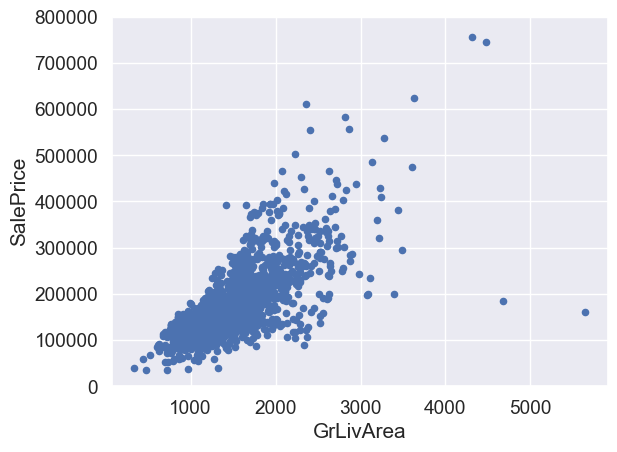

In [116]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Linear Relationship

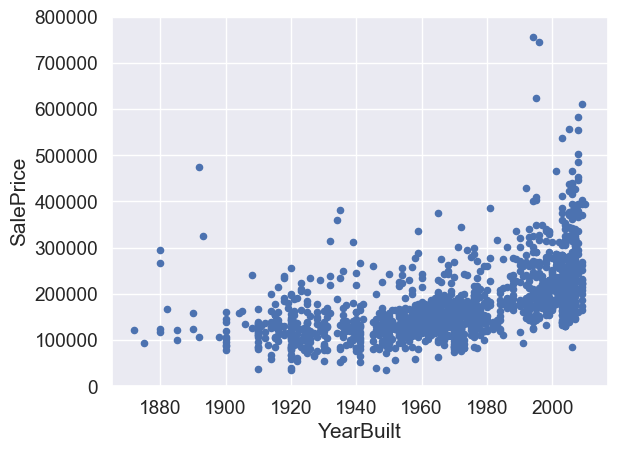

In [117]:
#scatter plot yearbuilt/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Not a strong linear relationship but new houses are in the upper range.

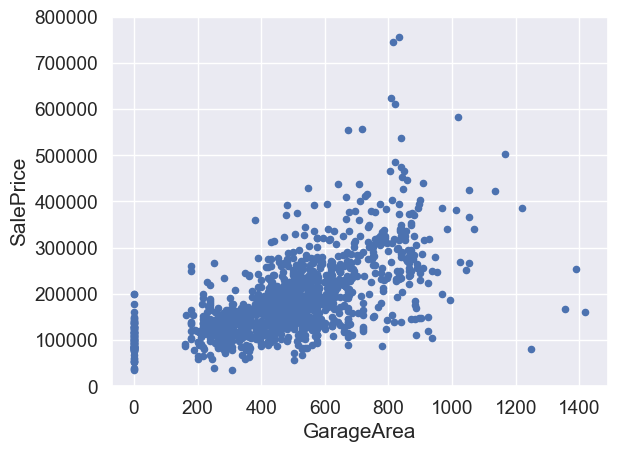

In [118]:
#scatter plot garagearea/saleprice
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Garage area doesnot seem to effect sale price very much.

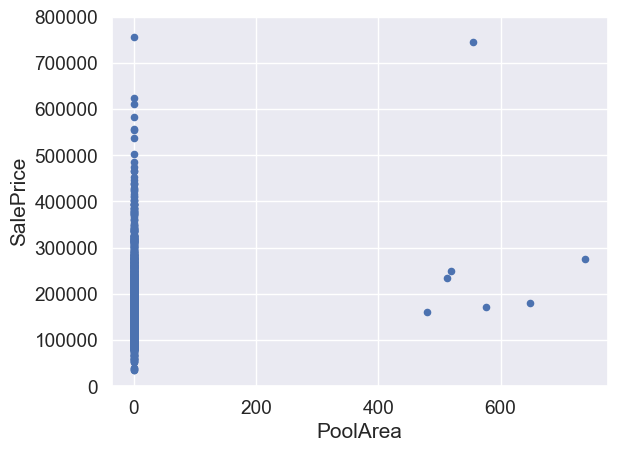

In [119]:
#scatter plot poolarea/saleprice
var =  'PoolArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Lots of missing values. Should ignore this.

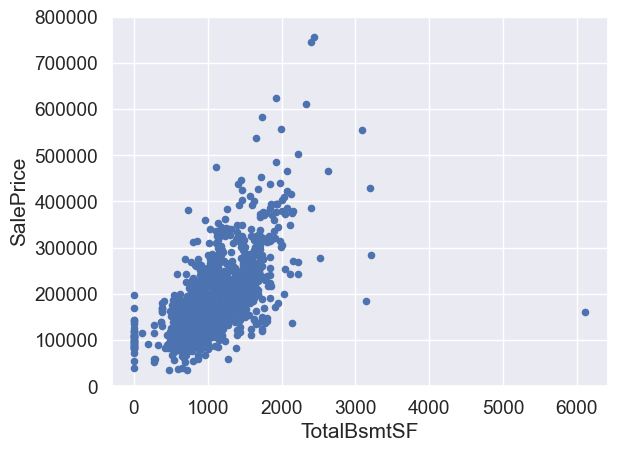

In [120]:
#scatter plot totalbsmtsf/saleprice
var =  'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Basement area and salesPrice seem like have a noticable correlation. 

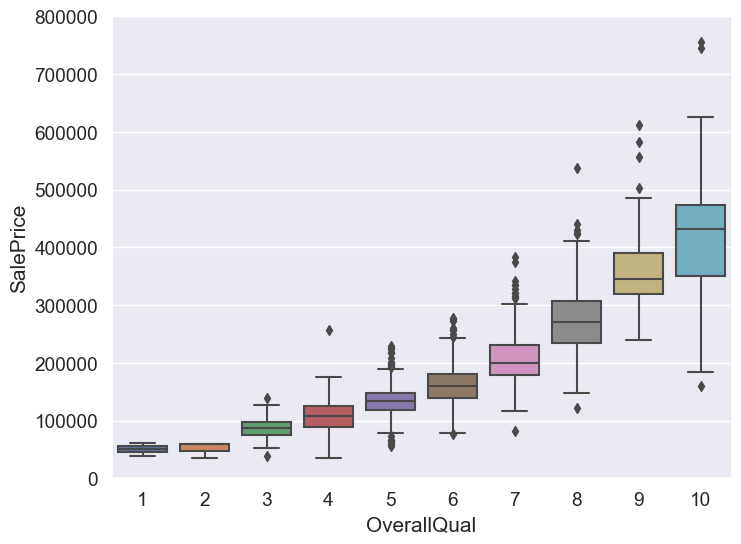

In [121]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Quality goes up, price goes up as expected

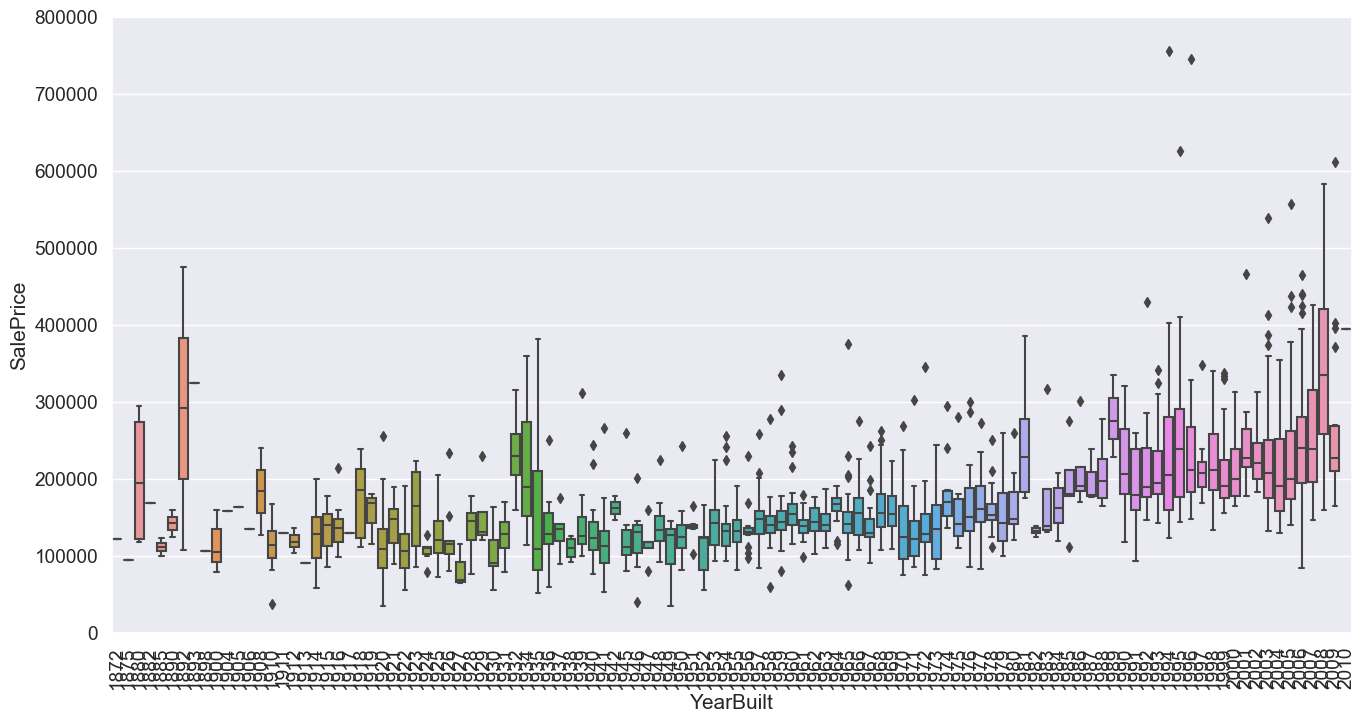

In [122]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Correlation matrix (heatmap style)

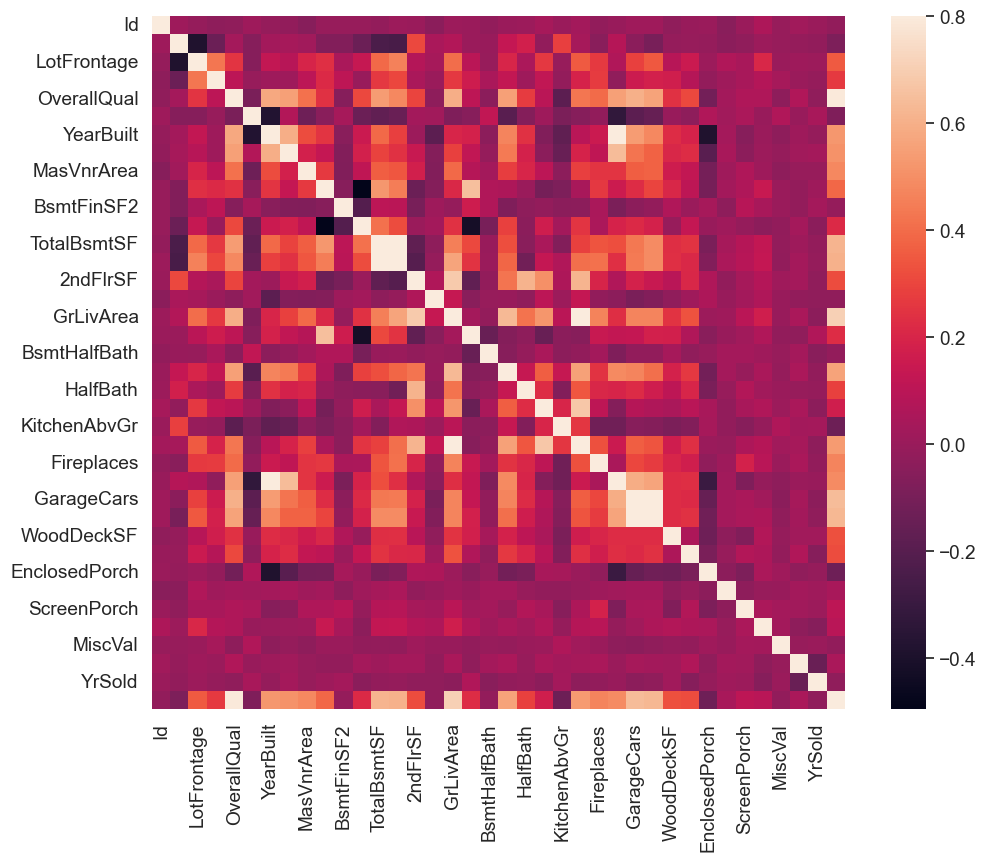

In [123]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Saleprice has strongest correlation with OveralQuality, GrLivArea. Strong correlation with TotalBsmtSF and 1st floor. 
Basement floor has storng correlation with first floor. 

'SalePrice' correlation matrix(10 highest correlated features)

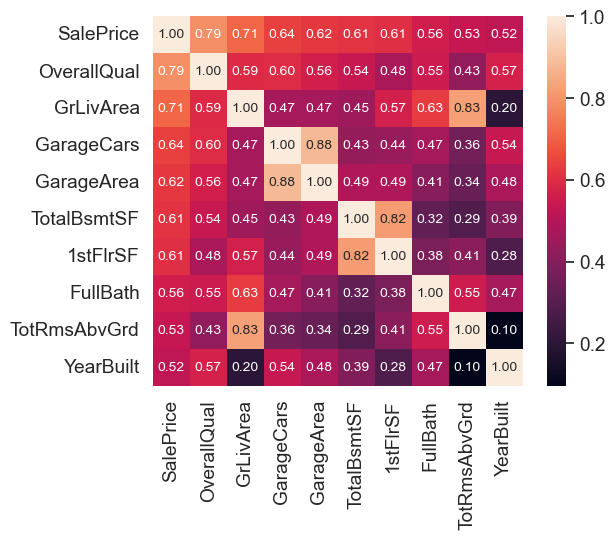

In [124]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Missing Data

In [125]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Drop the columns that have more than 15 percent missing vlaues. 
GarageYrBlt highly correlated with Year built. Droping this feature will not result in information loss.
BsmtFinType2 has good correlation with BsmtFullBath.MasVnrArea has good correlation with Overall quality. 
In summary, none of these missing values seems like it will affect the overall model. 
Electrical has only 1 missing vlaue. Since it it is only one observaiton, I'll delete the observation. 


In [126]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Dealing with outliers

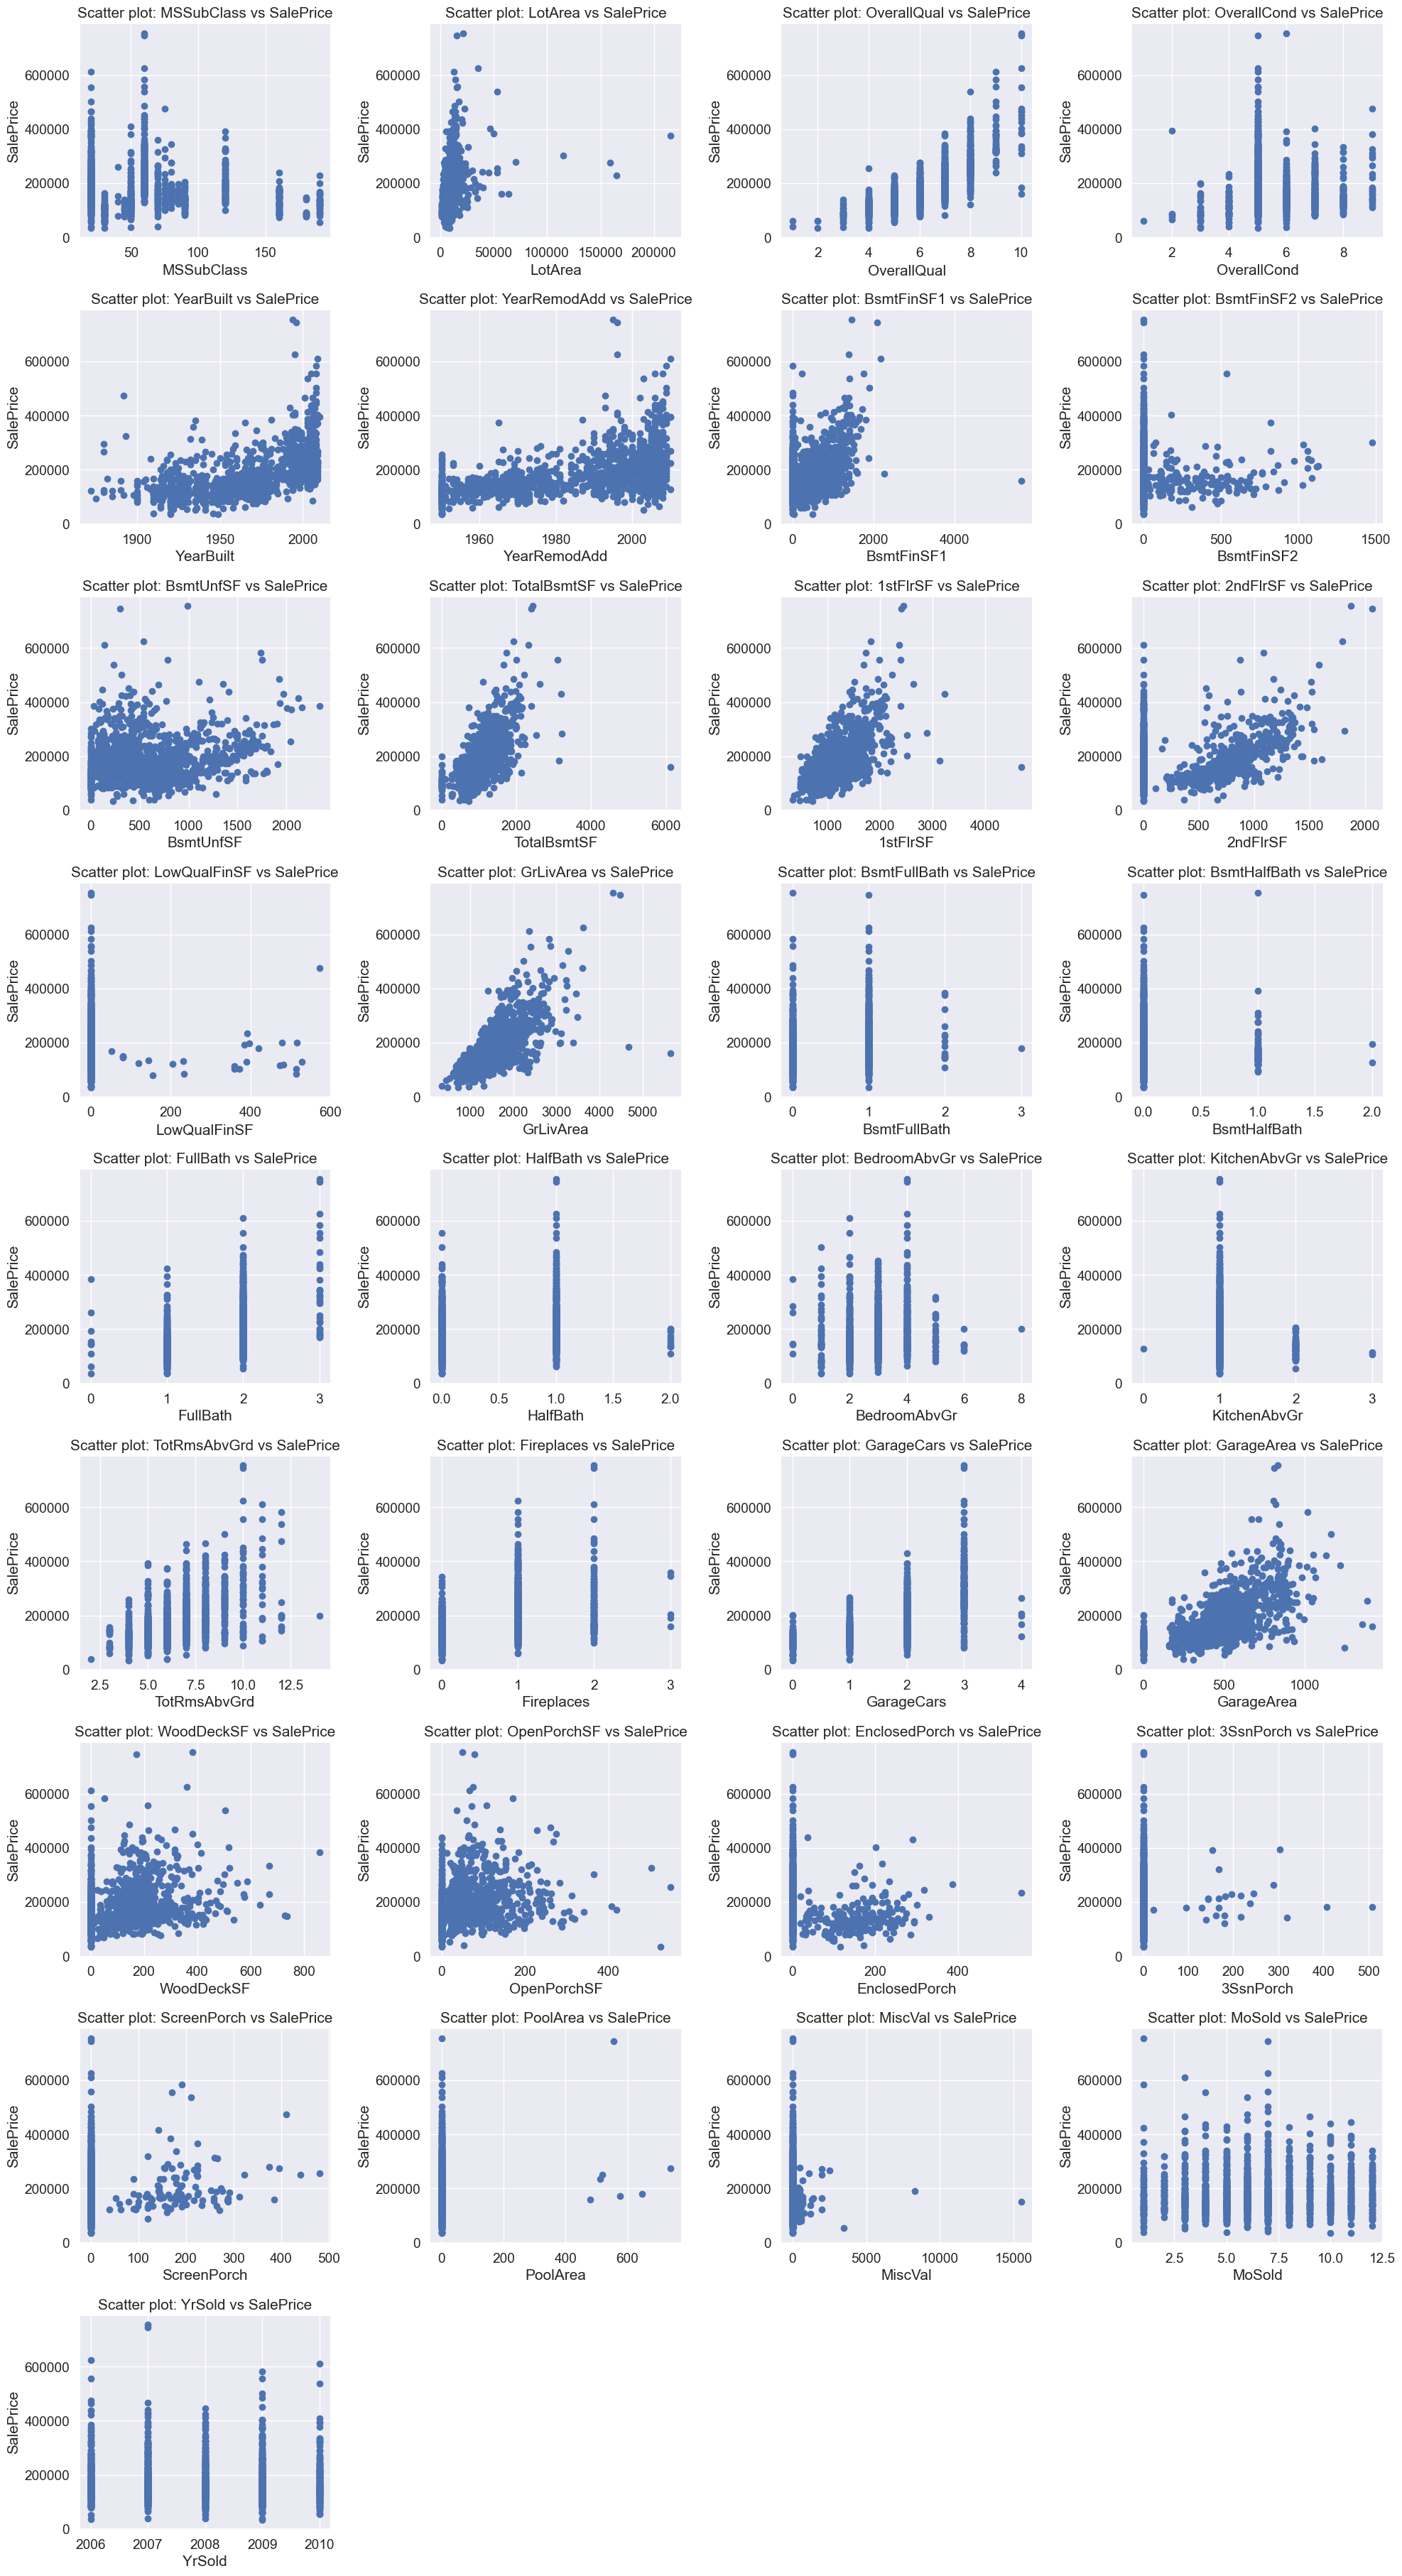

In [127]:
#overview of the all the numeric variable against SalesPrice. 

columns_to_drop = ['Id', 'SalePrice']
variables= df_train.drop(columns=columns_to_drop)
variables = variables.select_dtypes(include=['float64', 'int64']).columns


# Set the size of the overall plot
plt.figure(figsize=(20, 40))

# Loop through each variable and create a scatter plot
for i, var in enumerate(variables, 1):
    plt.subplot(10, 4, i)
    plt.scatter(x=df_train[var], y=df_train['SalePrice'])
    plt.title(f'Scatter plot: {var} vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


LotFrontage, LotArea, MasVnrArea, YearRemodAdd, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea might have outliers.

#### Bivariate analysis

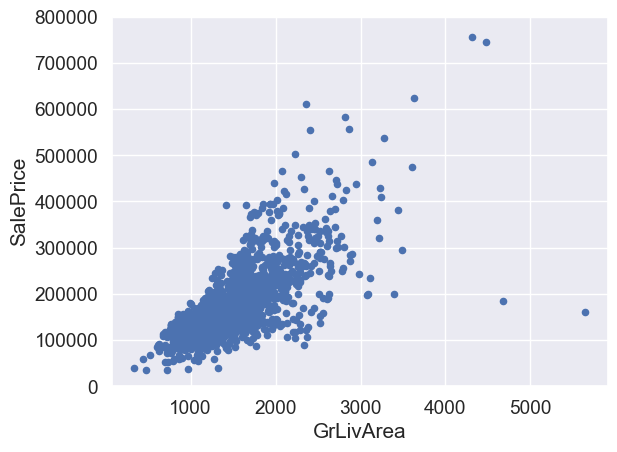

In [128]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [129]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


Eventhough Id 1182 and 691 look like outlier, they are following the trend. So, drop id 1299,524

In [130]:
to_drop = [1299, 524]
df_train = df_train[~df_train['Id'].isin(to_drop)]


<Axes: xlabel='LotArea', ylabel='SalePrice'>

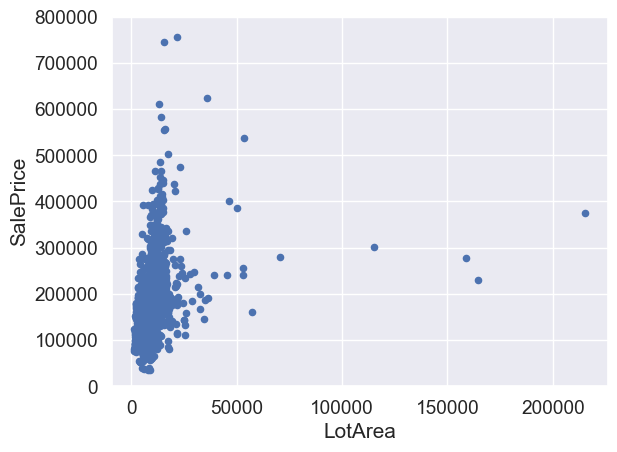

In [131]:
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [132]:
df_train.sort_values(by = 'LotArea', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,0,0,0,0,700,8,2008,WD,Normal,228950
249,250,50,RL,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,500,6,2007,WD,Normal,277000
706,707,20,RL,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,0,6,2007,WD,Normal,302000


In [133]:
to_drop = [314, 336, 250, 707]
df_train = df_train[~df_train['Id'].isin(to_drop)]


<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

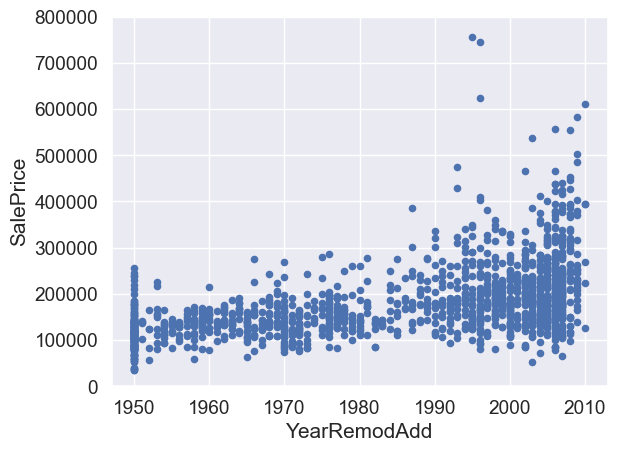

In [134]:
var = 'YearRemodAdd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [135]:
df_train.sort_values(by = 'YearRemodAdd', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
157,158,60,RL,12003,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,New,Partial,269500
378,379,20,RL,11394,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,New,Partial,394432
855,856,20,RL,6897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,127000
819,820,120,RL,6371,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,New,Partial,224000


In [136]:
to_drop = [158, 379]
df_train = df_train[~df_train['Id'].isin(to_drop)]


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

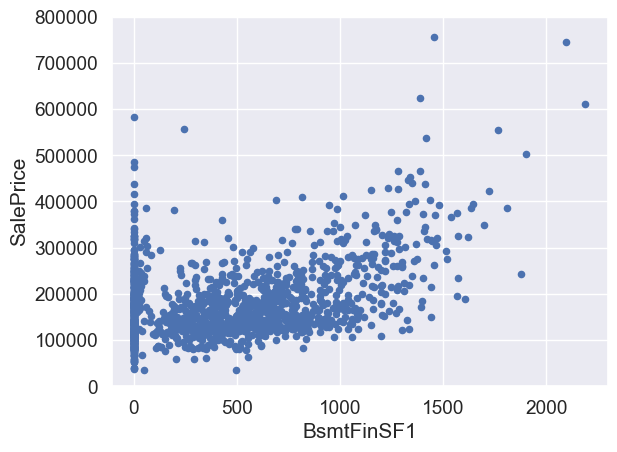

In [137]:
var = 'BsmtFinSF1'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [138]:
df_train.sort_values(by = 'BsmtFinSF1', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
178,179,20,RL,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2009,New,Partial,501837
70,71,20,RL,13651,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,244000


In [139]:
to_drop = [899, 1183]
df_train = df_train[~df_train['Id'].isin(to_drop)]


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

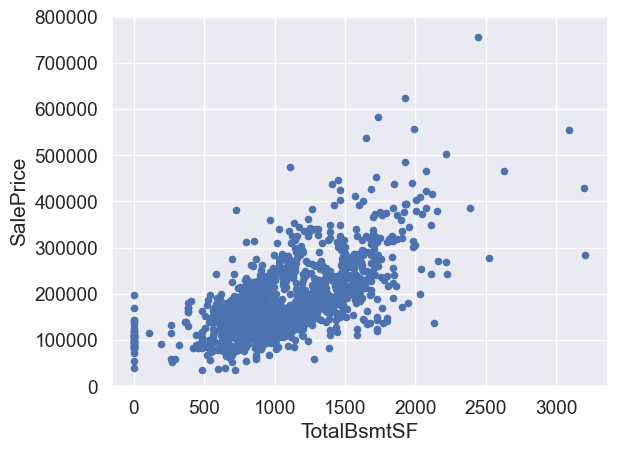

In [140]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [141]:
df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,284000
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
1373,1374,20,RL,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Normal,466500


In [142]:
to_drop = [333, 497, 441]
df_train = df_train[~df_train['Id'].isin(to_drop)]

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

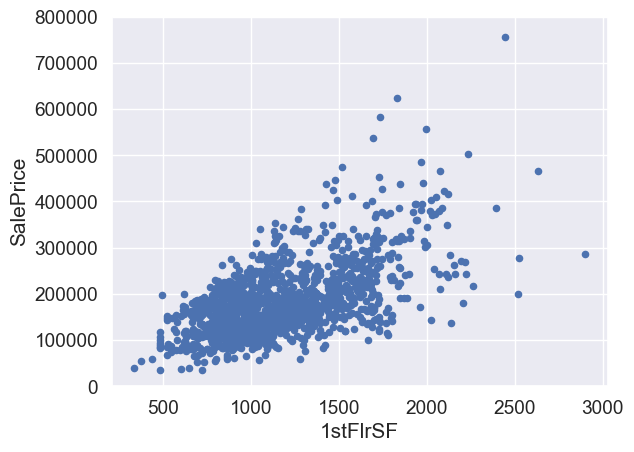

In [143]:
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [144]:
df_train.sort_values(by = '1stFlrSF', ascending = False)[:4]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1024,1025,20,RL,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,174,0,0,0,0,5,2008,COD,Abnorml,287000
1373,1374,20,RL,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Normal,466500
1044,1045,20,RL,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,278000
529,530,20,RL,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624


##### checking z score

In [145]:
from scipy.stats import zscore


# Select numerical columns only
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame(zscore(df_train[numerical_columns]), columns=numerical_columns)

# Calculate the mean of z-scores for each numerical column
z_scores_mean = z_scores.mean()

# Display the mean z-scores
print("Average Z-Scores:")
print(z_scores_mean)


Average Z-Scores:
Id               0.000000e+00
MSSubClass      -1.228463e-17
LotArea          9.213469e-18
OverallQual      2.284940e-16
OverallCond      3.071156e-16
YearBuilt       -3.395470e-15
YearRemodAdd    -5.773774e-16
BsmtFinSF1       7.370775e-17
BsmtFinSF2      -7.370775e-18
BsmtUnfSF        2.518348e-17
TotalBsmtSF     -9.336315e-17
1stFlrSF        -2.942168e-16
2ndFlrSF        -6.142313e-18
LowQualFinSF     1.965540e-17
GrLivArea        1.753630e-16
BsmtFullBath    -5.405235e-17
BsmtHalfBath     2.456925e-18
FullBath        -8.844930e-17
HalfBath         6.388005e-17
BedroomAbvGr    -3.931080e-17
KitchenAbvGr    -2.407787e-16
TotRmsAbvGrd     0.000000e+00
Fireplaces      -1.965540e-17
GarageCars       2.211233e-17
GarageArea       7.125083e-17
WoodDeckSF      -6.633698e-17
OpenPorchSF      4.744937e-17
EnclosedPorch   -2.579771e-17
3SsnPorch        2.211233e-17
ScreenPorch      2.886887e-17
PoolArea         4.913850e-18
MiscVal         -2.456925e-17
MoSold           9.336

Eventhough there is a presence of high z score, removing observations might result in information loss. Will come back later to reduce z score if necessary to see if it improves model performance. 

Four assumptions of linear regression are:
* Linearity: The relationship between X and the mean of Y is linear.
* Homoscedasticity: The variance of residual is the same for any value of X.
* Independence: Observations are independent of each other.
* Normality: For any fixed value of X, Y is normally distributed.

##### Normality check and log transform

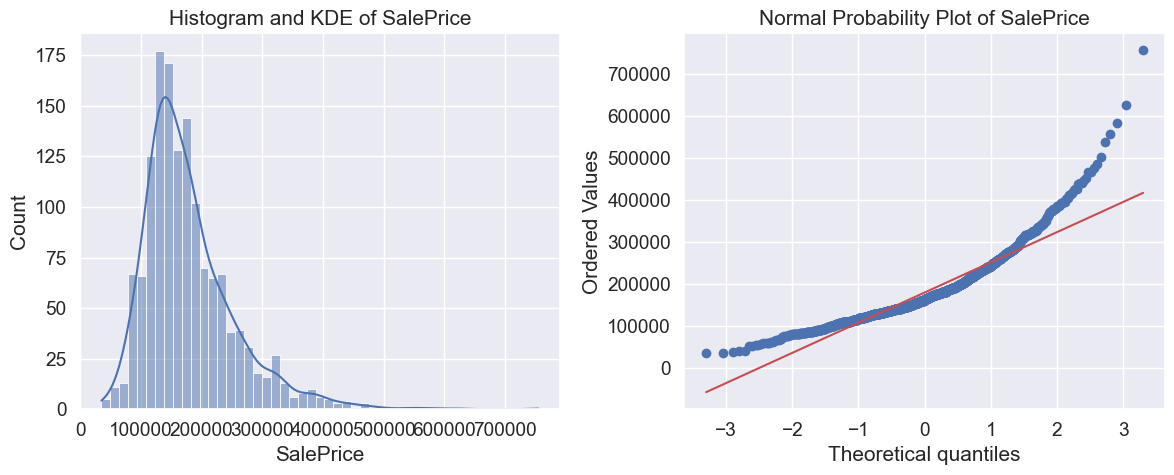

In [146]:
#histogram and normal probability plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with overlayed normal distribution curve
sns.histplot(df_train['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE of SalePrice')

# Normal probability plot
probplot(df_train['SalePrice'], plot=axes[1])
axes[1].set_title('Normal Probability Plot of SalePrice')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


SalePrice is not normal. It shows peakedness, positive skewness and does not follow the diagonalline. 

In [147]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

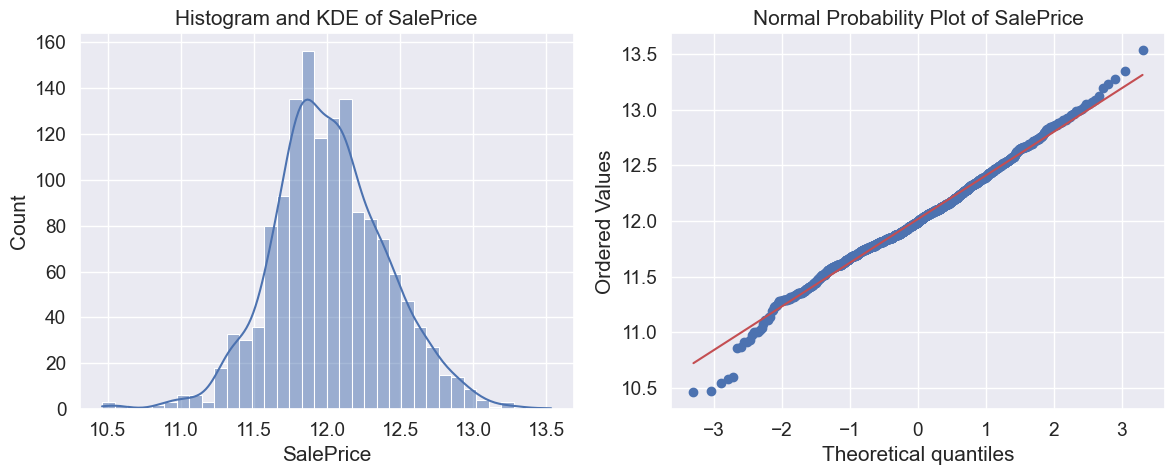

In [148]:
#transformed histogram and normal probability plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with overlayed normal distribution curve
sns.histplot(df_train['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE of SalePrice')

# Normal probability plot
probplot(df_train['SalePrice'], plot=axes[1])
axes[1].set_title('Normal Probability Plot of SalePrice')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


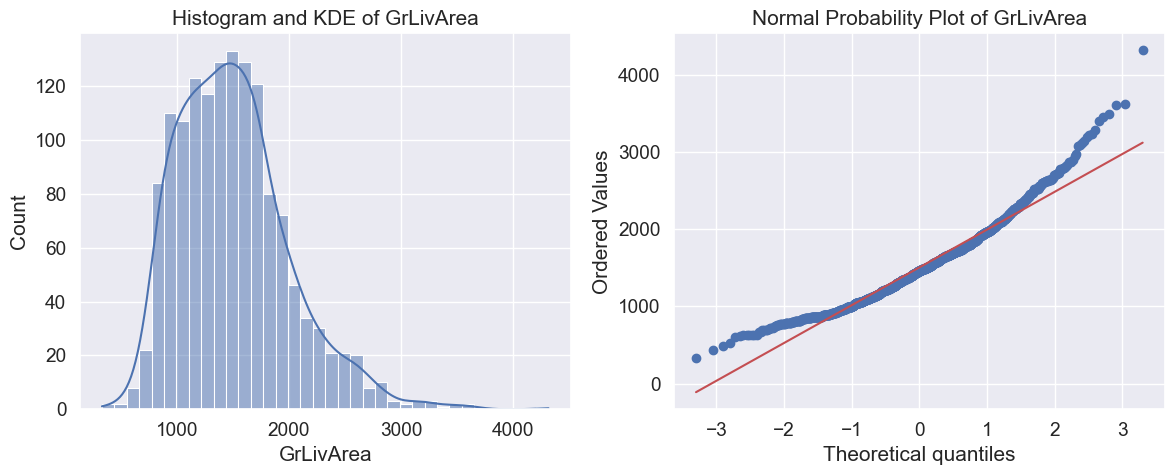

In [149]:
#histogram and normal probability plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with overlayed normal distribution curve
sns.histplot(df_train['GrLivArea'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE of GrLivArea')

# Normal probability plot
probplot(df_train['GrLivArea'], plot=axes[1])
axes[1].set_title('Normal Probability Plot of GrLivArea')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [150]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

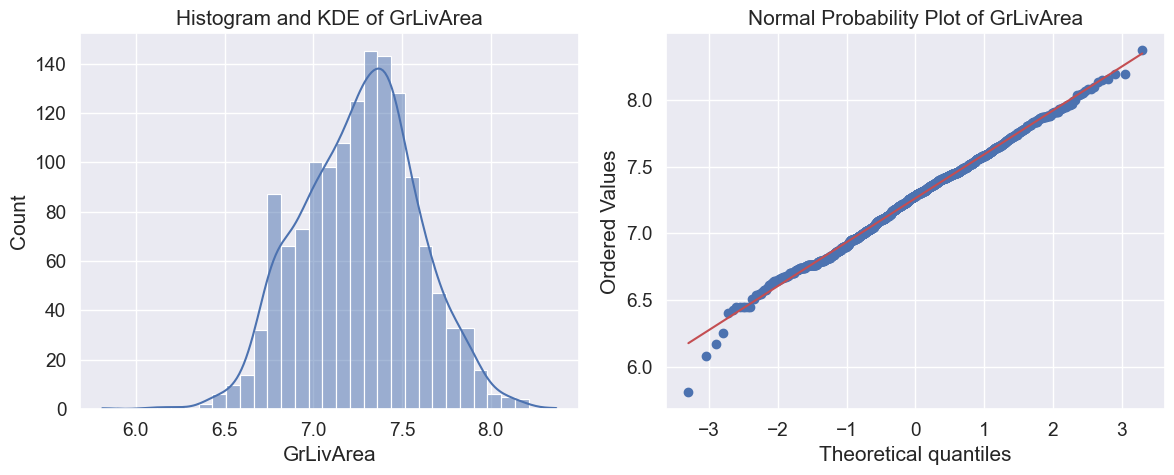

In [151]:
#histogram and normal probability plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with overlayed normal distribution curve
sns.histplot(df_train['GrLivArea'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE of GrLivArea')

# Normal probability plot
probplot(df_train['GrLivArea'], plot=axes[1])
axes[1].set_title('Normal Probability Plot of GrLivArea')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

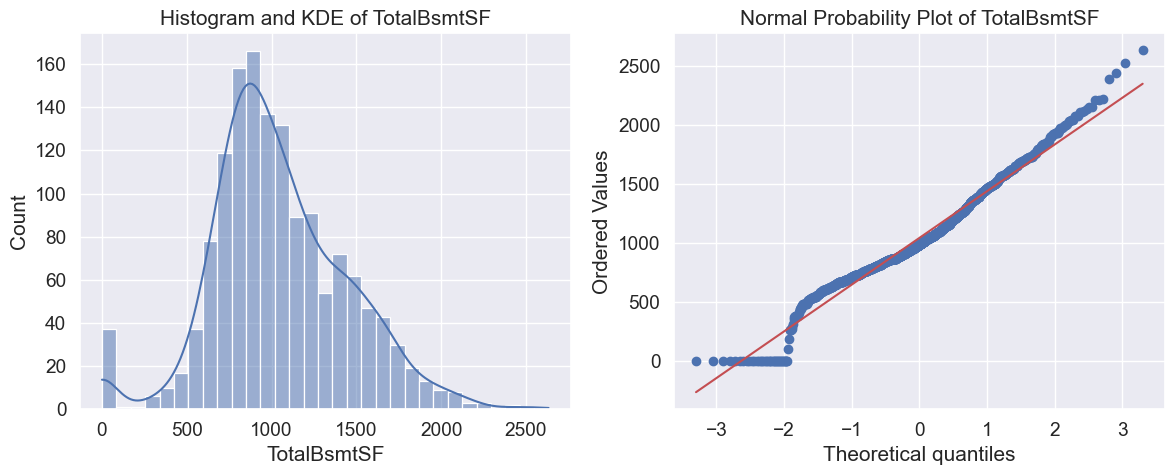

In [152]:
#histogram and normal probability plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with overlayed normal distribution curve
sns.histplot(df_train['TotalBsmtSF'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE of TotalBsmtSF')

# Normal probability plot
probplot(df_train['TotalBsmtSF'], plot=axes[1])
axes[1].set_title('Normal Probability Plot of TotalBsmtSF')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

The value zero doesn't allow us to do log transformations.

In [153]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [154]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

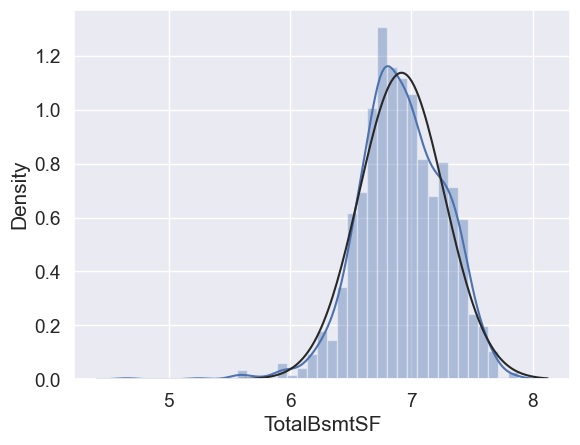

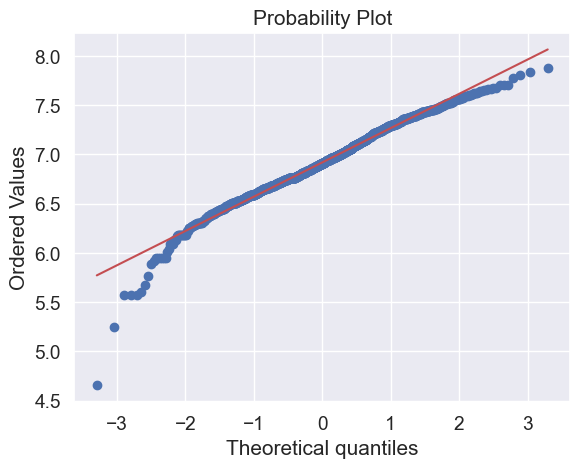

In [155]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

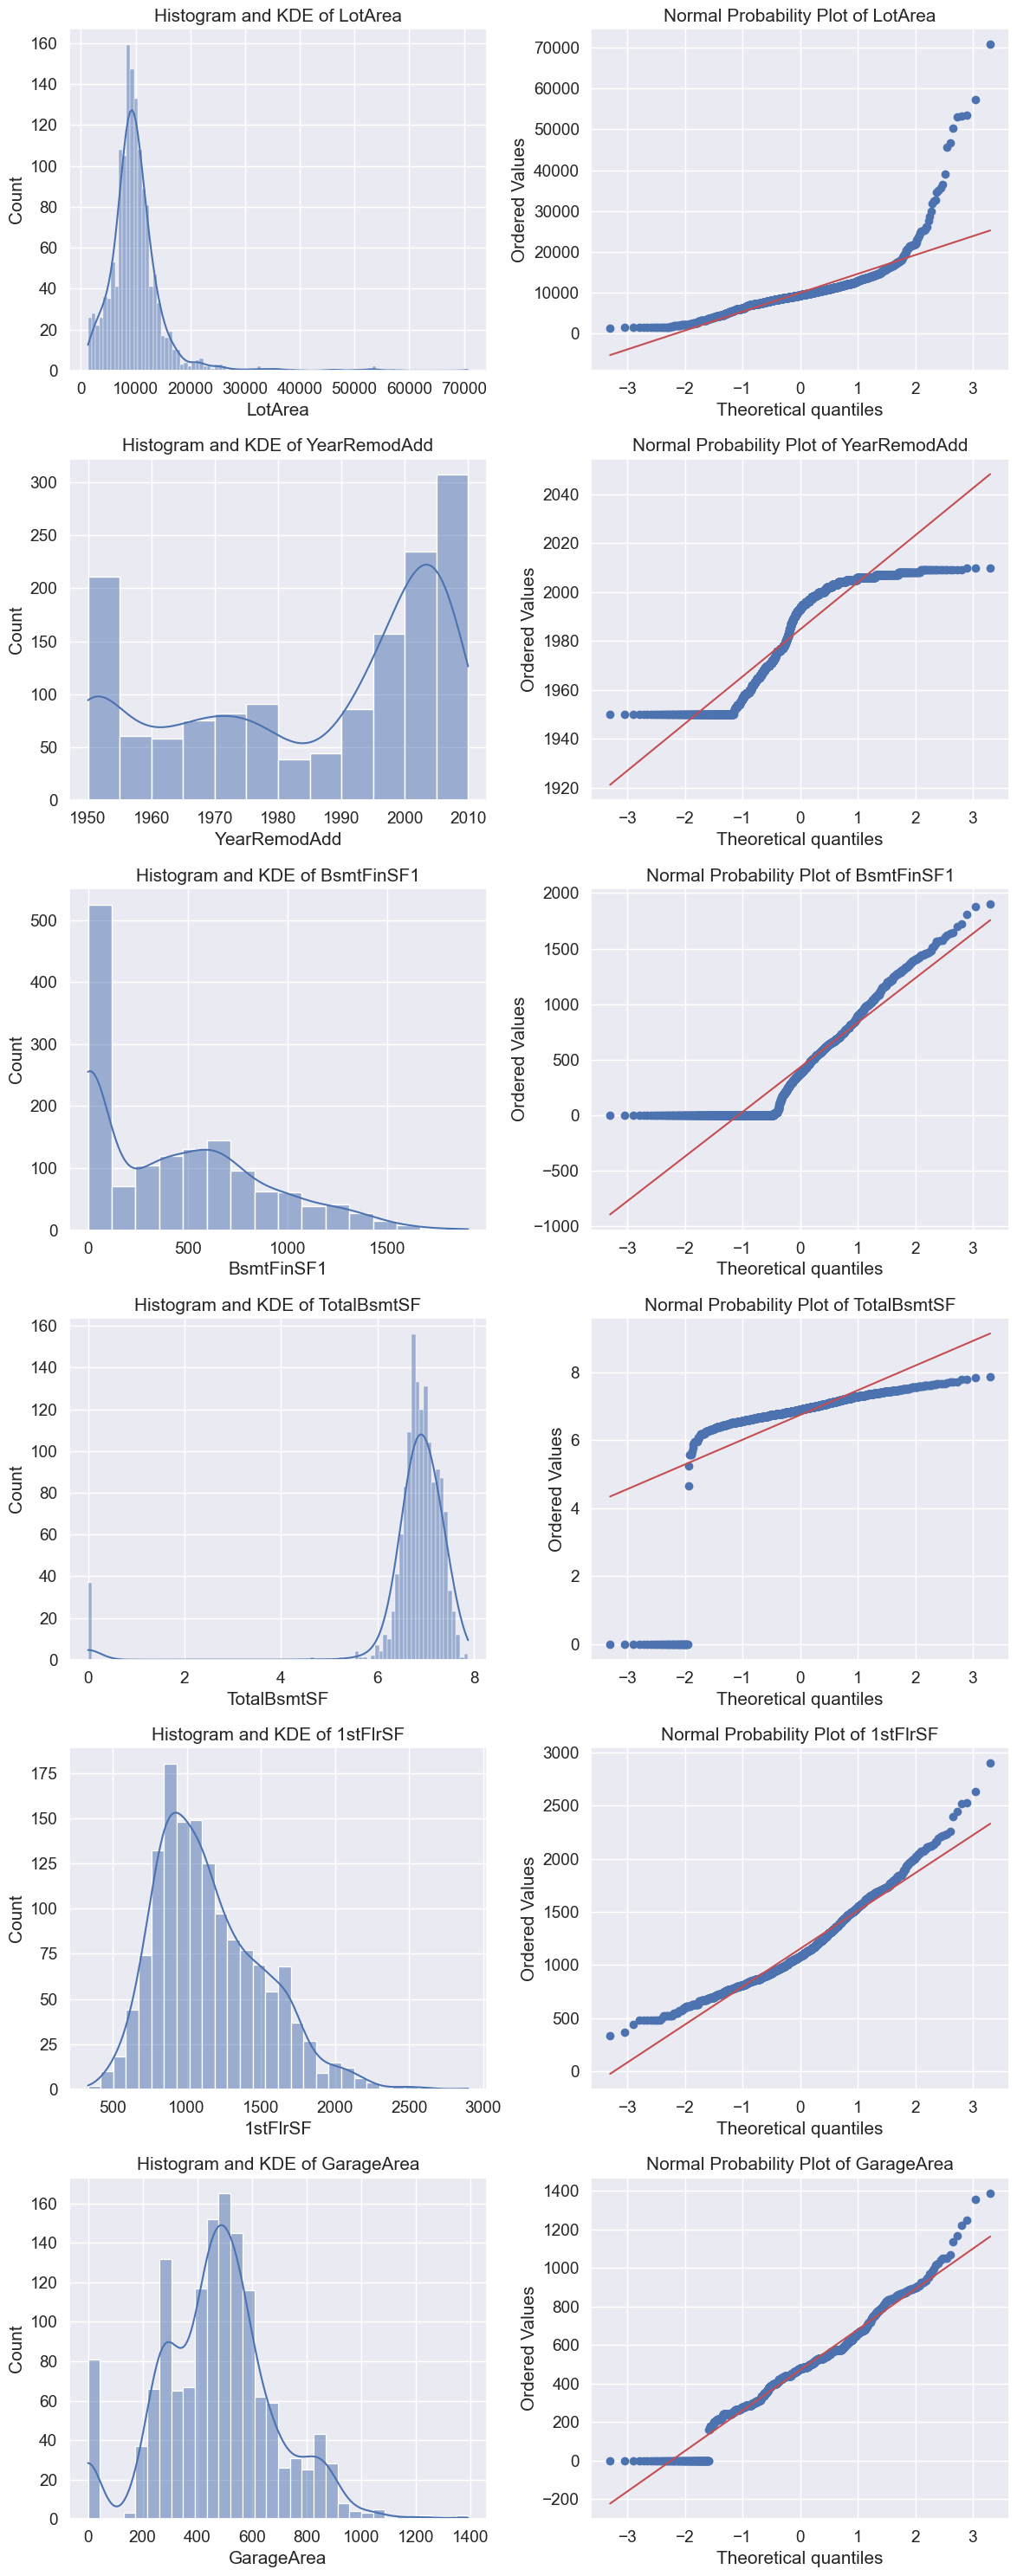

In [156]:
feature_to_check = ['LotArea', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

# Create a figure with subplots for each feature
fig, axes = plt.subplots(len(feature_to_check), 2, figsize=(12, 5 * len(feature_to_check)))

# Iterate over features
for i, feature in enumerate(feature_to_check):
    # Histogram with overlayed normal distribution curve
    sns.histplot(df_train[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram and KDE of {feature}')

    # Normal probability plot
    probplot(df_train[feature], plot=axes[i, 1])
    axes[i, 1].set_title(f'Normal Probability Plot of {feature}')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Logtransfrom : LotArea, GarageArea, 1stFlrSF
GarageArea has 0. First have to encode into binary

In [157]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['GarAr'] = pd.Series(len(df_train['GarageArea']), index=df_train.index)
df_train['GarAr'] = 0 
df_train.loc[df_train['GarageArea']>0,'GarAr'] = 1

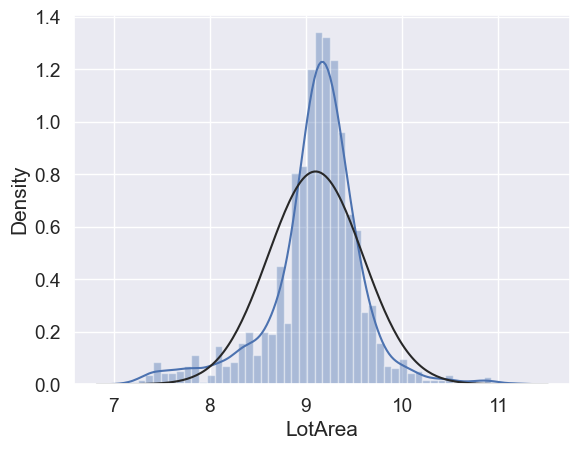

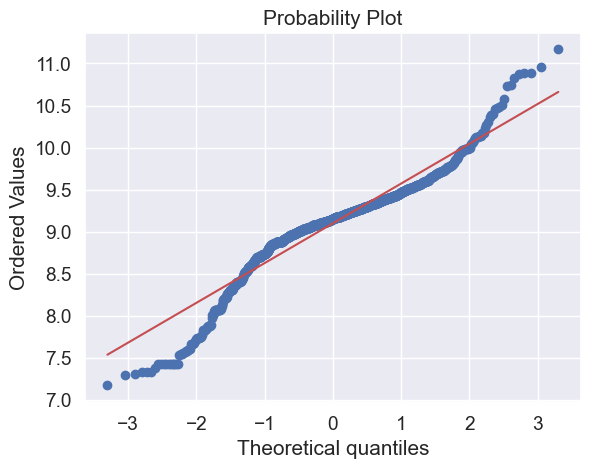

In [158]:
#data transformation for lotarea
df_train['LotArea'] = np.log(df_train['LotArea'])
sns.distplot(df_train['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['LotArea'], plot=plt)

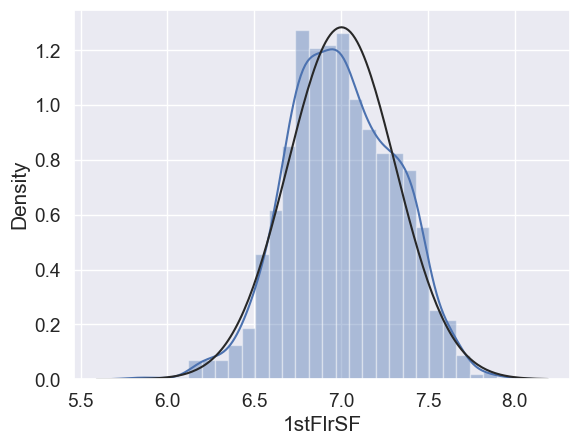

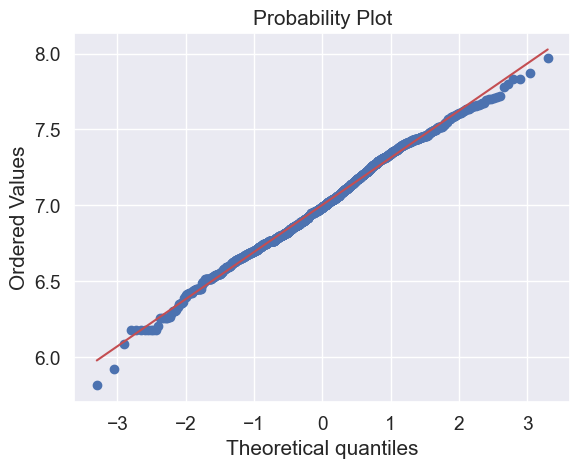

In [159]:
#data transformation
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])

sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)

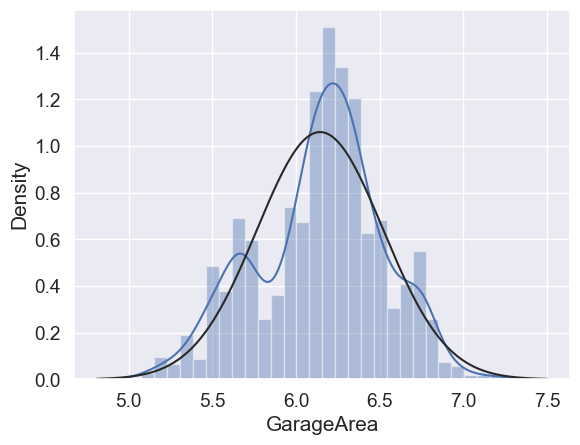

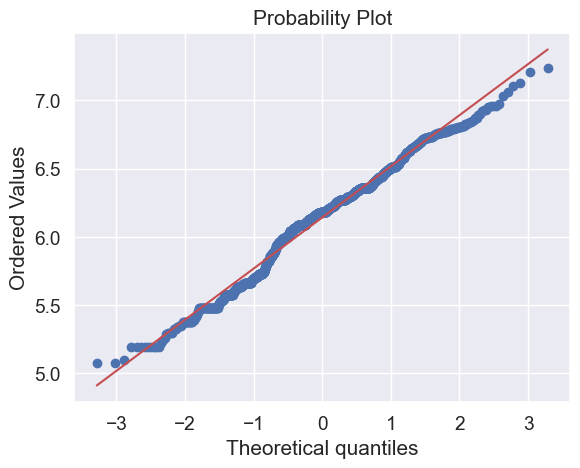

In [160]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['GarAr'] = pd.Series(len(df_train['GarageArea']), index=df_train.index)
df_train['GarAr'] = 0 
df_train.loc[df_train['GarageArea']>0,'GarAr'] = 1

#transform data
df_train.loc[df_train['GarAr']==1,'GarageArea'] = np.log(df_train['GarageArea'])

#histogram and normal probability plot
sns.distplot(df_train[df_train['GarageArea']>0]['GarageArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['GarageArea']>0]['GarageArea'], plot=plt)